In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ternary

# Preprocessing dataframe

In [2]:
df_differ = pd.read_csv('feature-coefs_differ-sign.csv')
df_imbalance = pd.read_csv('feature_layer-imbalance.csv')

In [3]:
df_coefs = (
    pd.read_csv('explore_coefs-real.csv')
    .drop(
        columns=['Unnamed: 0', 'layers', 'accuracy', 'auroc', 'pr']
    )
)

In [4]:
df_coefs_proc = (
    df_coefs
    .query('theta == 0.30')
    .drop('theta', axis=1)
    .rename(columns={
        'intercept': 'exp-coef_intercept',
        'coef_distances': 'exp-coef_distances',
        'coef_degrees': 'exp-coef_degrees',
        'coef_int': 'proc-coef_intercept',
    })
    .drop(
        columns=['imbalance', 'denominator', 'abs_dists', 'abs_degs', 'abs_int', 'norm_dists', 'norm_degs', 'old_norm_dists']
    )
)
df_coefs_proc.head()

,system,embedding,exp-coef_intercept,exp-coef_distances,exp-coef_degrees,proc-coef_intercept
45,arxiv,HOPE,-0.136921,-1.728439,-6.672261,-0.256608
46,arxiv,HOPE,-0.135413,-1.749060,-6.701445,-0.253782
47,arxiv,HOPE,-0.072200,-1.756384,-6.802558,-0.135312
48,arxiv,HOPE,-0.073931,-1.726515,-6.821992,-0.138557
49,arxiv,HOPE,-0.036342,-2.171787,-6.992828,-0.068111


In [5]:
df_coefs_proc['exp-feature_normalization'] = np.sum(
    np.abs(df_coefs_proc[['exp-coef_intercept', 'exp-coef_distances', 'exp-coef_degrees']]),
    axis=1
)
df_coefs_proc['proc-feature_normalization'] = np.sum(
    np.abs(df_coefs_proc[['proc-coef_intercept', 'exp-coef_distances', 'exp-coef_degrees']]),
    axis=1
)
df_coefs_proc.head()

,system,embedding,exp-coef_intercept,exp-coef_distances,exp-coef_degrees,proc-coef_intercept,exp-feature_normalization,proc-feature_normalization
45,arxiv,HOPE,-0.136921,-1.728439,-6.672261,-0.256608,8.537622,8.657309
46,arxiv,HOPE,-0.135413,-1.749060,-6.701445,-0.253782,8.585918,8.704287
47,arxiv,HOPE,-0.072200,-1.756384,-6.802558,-0.135312,8.631141,8.694253
48,arxiv,HOPE,-0.073931,-1.726515,-6.821992,-0.138557,8.622438,8.687064
49,arxiv,HOPE,-0.036342,-2.171787,-6.992828,-0.068111,9.200957,9.232725


In [6]:
df_coefs_proc['exp-feature_distances'] = np.abs(df_coefs_proc['exp-coef_distances']) / df_coefs_proc['exp-feature_normalization']
df_coefs_proc['exp-feature_degrees'] = np.abs(df_coefs_proc['exp-coef_degrees']) / df_coefs_proc['exp-feature_normalization']
df_coefs_proc['exp-feature_intercept'] = 1 - df_coefs_proc['exp-feature_distances'] - df_coefs_proc['exp-feature_degrees']

df_coefs_proc['proc-feature_distances'] = np.abs(df_coefs_proc['exp-coef_distances']) / df_coefs_proc['proc-feature_normalization']
df_coefs_proc['proc-feature_degrees'] = np.abs(df_coefs_proc['exp-coef_degrees']) / df_coefs_proc['proc-feature_normalization']
df_coefs_proc['proc-feature_intercept'] = 1 - df_coefs_proc['proc-feature_distances'] - df_coefs_proc['proc-feature_degrees']

df_coefs_proc.head()

,system,embedding,exp-coef_intercept,exp-coef_distances,exp-coef_degrees,proc-coef_intercept,exp-feature_normalization,proc-feature_normalization,exp-feature_distances,exp-feature_degrees,exp-feature_intercept,proc-feature_distances,proc-feature_degrees,proc-feature_intercept
45,arxiv,HOPE,-0.136921,-1.728439,-6.672261,-0.256608,8.537622,8.657309,0.202450,0.781513,0.016037,0.199651,0.770708,0.029641
46,arxiv,HOPE,-0.135413,-1.749060,-6.701445,-0.253782,8.585918,8.704287,0.203713,0.780516,0.015772,0.200942,0.769902,0.029156
47,arxiv,HOPE,-0.072200,-1.756384,-6.802558,-0.135312,8.631141,8.694253,0.203494,0.788141,0.008365,0.202017,0.782420,0.015563
48,arxiv,HOPE,-0.073931,-1.726515,-6.821992,-0.138557,8.622438,8.687064,0.200235,0.791191,0.008574,0.198746,0.785305,0.015950
49,arxiv,HOPE,-0.036342,-2.171787,-6.992828,-0.068111,9.200957,9.232725,0.236039,0.760011,0.003950,0.235227,0.757396,0.007377


In [132]:
df_coefs_proc.to_csv('dataframe_coefs-real.csv')

NameError: name 'DFS' is not defined

# Updated visualizations

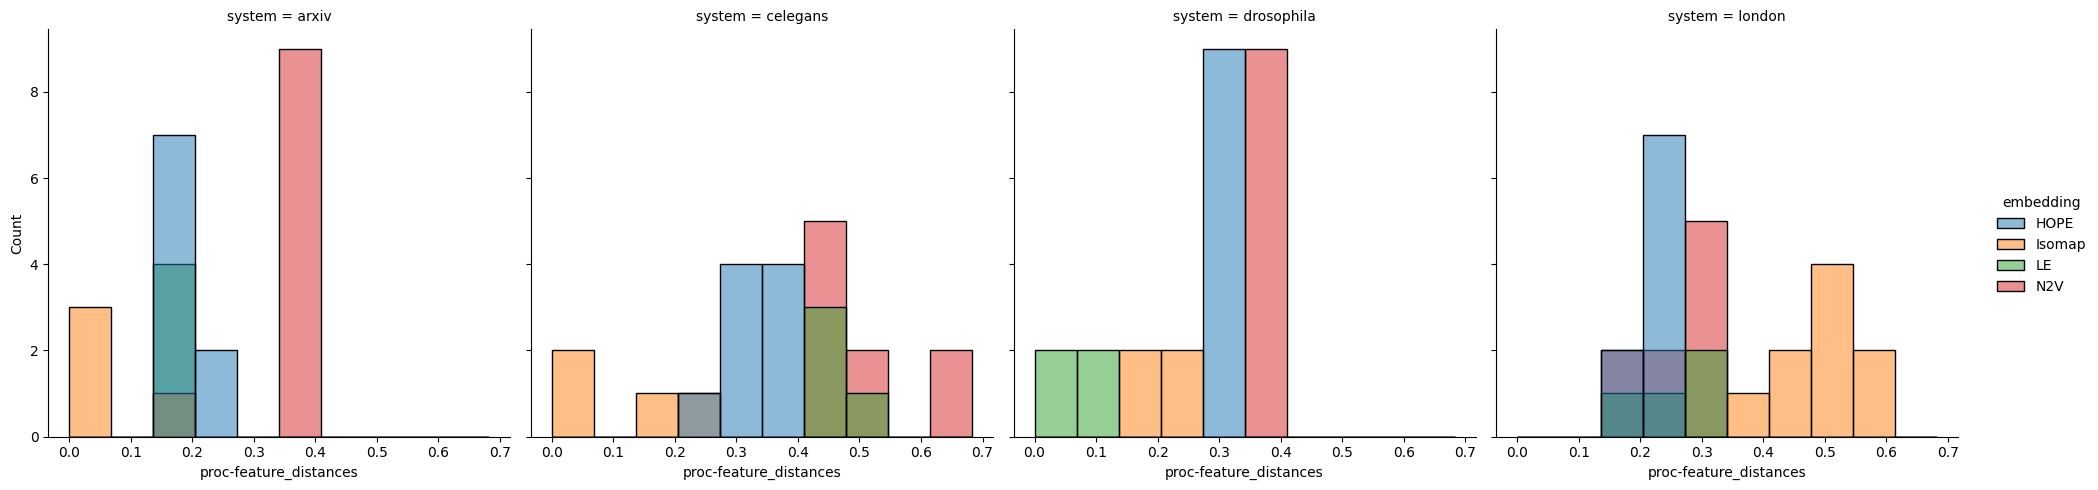

In [8]:
sns.displot(
    data=df_coefs_proc, kind='hist',
    x='proc-feature_distances',
    hue='embedding',
    col='system'
)

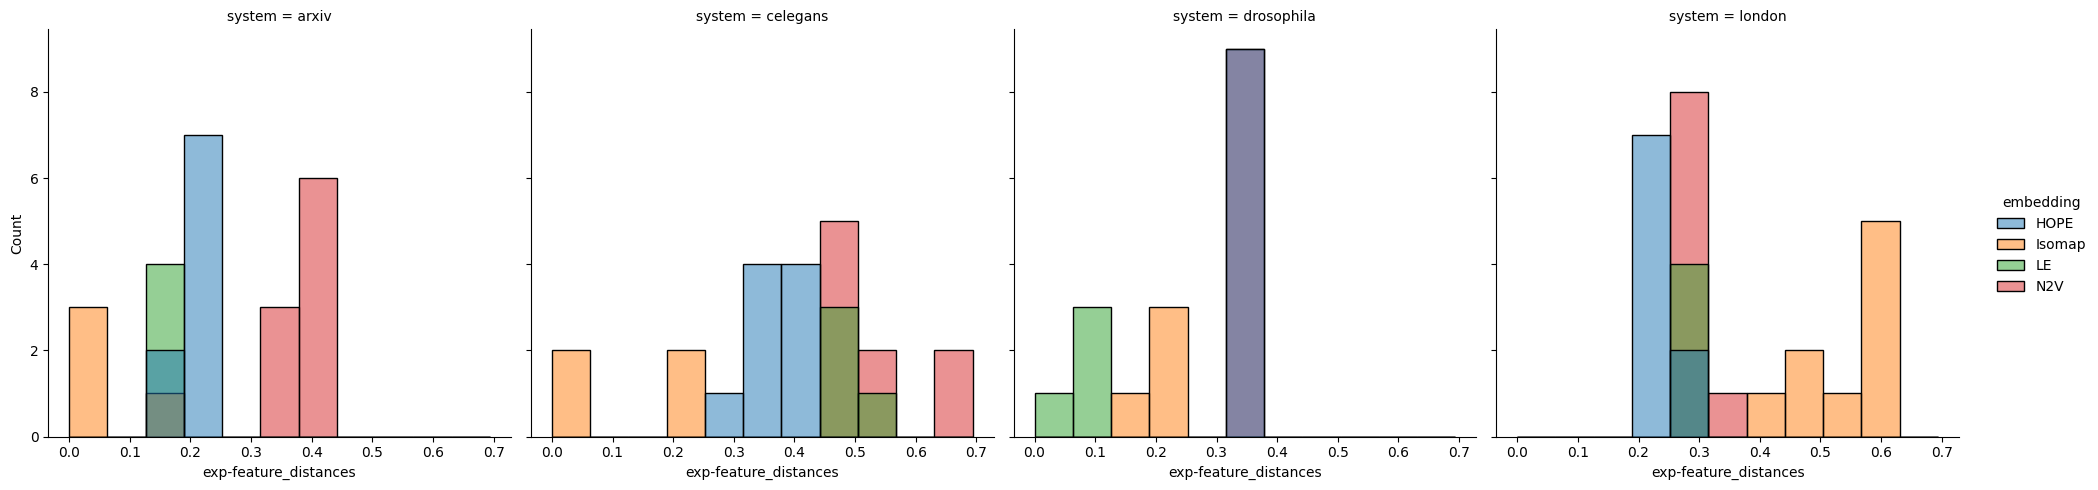

In [9]:
sns.displot(
    data=df_coefs_proc, kind='hist',
    x='exp-feature_distances',
    hue='embedding',
    col='system'
)

/home/daniel/.cache/pypoetry/virtualenvs/emb-RU2cJ17K-py3.10/lib/python3.10/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)
/home/daniel/.cache/pypoetry/virtualenvs/emb-RU2cJ17K-py3.10/lib/python3.10/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)
/home/daniel/.cache/pypoetry/virtualenvs/emb-RU2cJ17K-py3.10/lib/python3.10/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)
/home/daniel/.cache/pypoetry/virtualenvs/emb-RU2cJ17K-py3.10/lib/python3.10/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will 

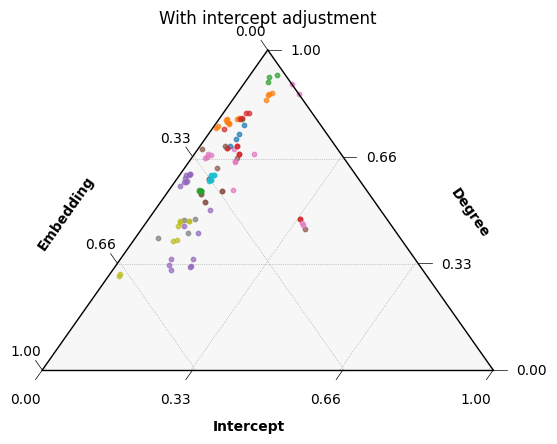

In [10]:
figure, tax = ternary.figure(scale=100)

tax.gridlines(color="gray", multiple=33, alpha=0.75)
tax.boundary(linewidth=1)

tax.left_axis_label("Embedding", offset=0.2, fontdict={'size': 10, 'weight': 'bold'})
tax.right_axis_label("Degree", offset=0.2, fontdict={'size': 10, 'weight': 'bold'})
tax.bottom_axis_label("Intercept", offset=0.15, fontdict={'size': 10, 'weight': 'bold'})

for system in ['arxiv', 'celegans', 'drosophila', 'london']:
    for emb in ['HOPE', 'Isomap', 'LE', 'N2V']:
        df_ = df_coefs_proc.query('system == @system & embedding == @emb')[["proc-feature_intercept", "proc-feature_degrees", "proc-feature_distances"]]
        pts = [
            (100*float(x), 100*float(y), 100*float(z))
            for (_,(x,y,z)) in df_.iterrows()
        ]
        
        tax.scatter(
            pts,
            s=10,
            alpha=0.7
        )

tax.ticks([0., 0.33, 0.66, 1.00], axis='lbr', linewidth=0.5, offset=0.03, tick_formats="%.2f")

tax.set_title('With intercept adjustment', pad=10)

tax.clear_matplotlib_ticks()
tax.get_axes().axis("off")

ternary.plt.show()

tax.savefig('ternary_with-adjustment.png', dpi=600, facecolor='white', transparent=False)

/home/daniel/.cache/pypoetry/virtualenvs/emb-RU2cJ17K-py3.10/lib/python3.10/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)
/home/daniel/.cache/pypoetry/virtualenvs/emb-RU2cJ17K-py3.10/lib/python3.10/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)
/home/daniel/.cache/pypoetry/virtualenvs/emb-RU2cJ17K-py3.10/lib/python3.10/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)
/home/daniel/.cache/pypoetry/virtualenvs/emb-RU2cJ17K-py3.10/lib/python3.10/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will 

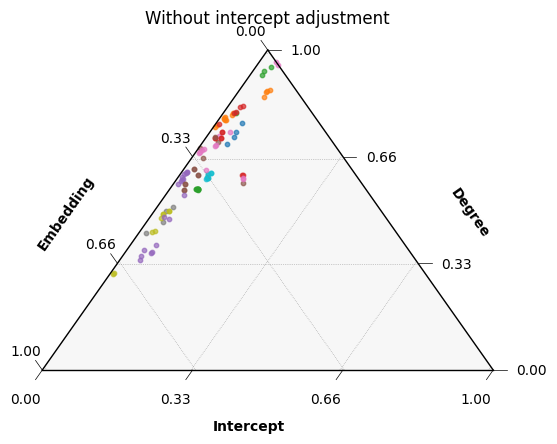

In [11]:
figure, tax = ternary.figure(scale=100)

tax.gridlines(color="gray", multiple=33, alpha=0.75)
tax.boundary(linewidth=1)

tax.left_axis_label("Embedding", offset=0.2, fontdict={'size': 10, 'weight': 'bold'})
tax.right_axis_label("Degree", offset=0.2, fontdict={'size': 10, 'weight': 'bold'})
tax.bottom_axis_label("Intercept", offset=0.15, fontdict={'size': 10, 'weight': 'bold'})

for system in ['arxiv', 'celegans', 'drosophila', 'london']:
    for emb in ['HOPE', 'Isomap', 'LE', 'N2V']:
        df_ = df_coefs_proc.query('system == @system & embedding == @emb')[["exp-feature_intercept", "exp-feature_degrees", "exp-feature_distances"]]
        pts = [
            (100*float(x), 100*float(y), 100*float(z))
            for (_,(x,y,z)) in df_.iterrows()
        ]
        
        tax.scatter(
            pts,
            s=10,
            alpha=0.7
        )

tax.ticks([0., 0.33, 0.66, 1.00], axis='lbr', linewidth=0.5, offset=0.03, tick_formats="%.2f")

tax.set_title('Without intercept adjustment', pad=10)

tax.clear_matplotlib_ticks()
tax.get_axes().axis("off")

ternary.plt.show()

tax.savefig('ternary_without-adjustment.png', dpi=600, facecolor='white', transparent=False)

# Log-odds compatibility

In [12]:
rng = np.random.default_rng()

In [13]:
def logodds(x1, x2, b0, b1, b2):
    lin = b0 + b1*x1 + b2*x2
    logit = 1 / (1 + np.exp(-lin))

    odds = logit / (1 - logit)

    return np.log(odds)

In [14]:
smp = df_coefs_proc.sample(n=1)
b0, b1, b2 = smp[['exp-feature_intercept', 'exp-feature_distances', 'exp-feature_degrees']].iloc[0]
c0, c1, c2 = smp[['proc-feature_intercept', 'proc-feature_distances', 'proc-feature_degrees']].iloc[0]

In [15]:
logodds_nonadj = []
logodds_adj = []
for _ in range(1000):
    x_dist = rng.normal(0, 0.5)
    x_degs = rng.normal(0, 0.5)
    logodds_nonadj.append(logodds(x_dist, x_degs, b0, b1, b2))
    logodds_adj.append(logodds(x_dist, x_degs, c0, c1, c2))

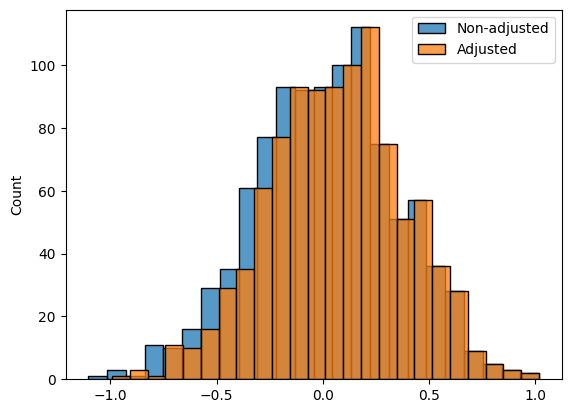

In [16]:
g = sns.histplot(logodds_nonadj, label='Non-adjusted')
sns.histplot(logodds_adj, label='Adjusted')

g.legend()

In [17]:
sum([np.sign(logodds_adj[idx]) == np.sign(logodds_nonadj[idx]) for idx in range(len(logodds_adj))]) / len(logodds_adj)

0.939

In [18]:
logodds_nonadj = []
logodds_adj = []
for _ in range(1000):
    x_dist = rng.uniform(-1, 1)
    x_degs = rng.uniform(-1, 1)
    logodds_nonadj.append(logodds(x_dist, x_degs, b0, b1, b2))
    logodds_adj.append(logodds(x_dist, x_degs, c0, c1, c2))

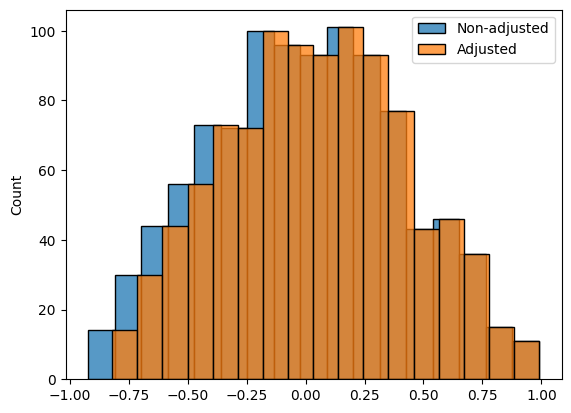

In [19]:
g = sns.histplot(logodds_nonadj, label='Non-adjusted')
sns.histplot(logodds_adj, label='Adjusted')

g.legend()

In [20]:
sum([np.sign(logodds_adj[idx]) == np.sign(logodds_nonadj[idx]) for idx in range(len(logodds_adj))]) / len(logodds_adj)

0.949

In [21]:
k = 100
smp = df_coefs_proc.sample(n=k)
b0, b1, b2 = smp['exp-feature_intercept'], smp['exp-feature_distances'], smp['exp-feature_degrees']
c0, c1, c2 = smp['proc-feature_intercept'], smp['proc-feature_distances'], smp['proc-feature_degrees']

In [22]:
x_dists = rng.uniform(-1, 1, k)
x_degs = rng.uniform(-1, 1, k)

In [23]:
logodds_adj = np.array([
    logodds(x, y, a, b, c)
    for x, y, a, b, c in zip(x_dists, x_degs, c0, c1, c2)
])

In [24]:
logodds_nonadj = np.array([
    logodds(x, y, a, b, c)
    for x, y, a, b, c in zip(x_dists, x_degs, b0, b1, b2)
])

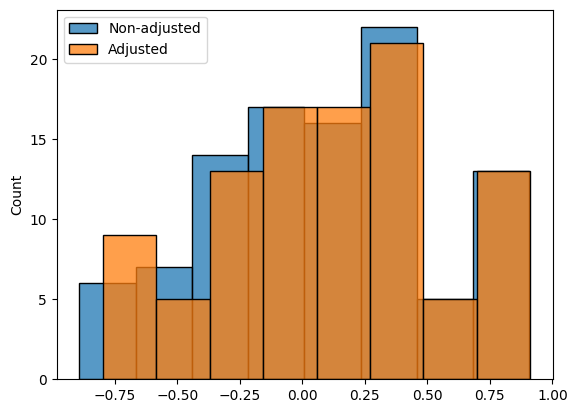

In [25]:
g = sns.histplot(logodds_nonadj, label='Non-adjusted')
sns.histplot(logodds_adj, label='Adjusted')

g.legend()

## Defining priors

In [39]:
def plt_by_system_normal(system):
    smp = df_coefs_proc.query('system == @system')
    k=len(smp)
    b0, b1, b2 = smp['exp-feature_intercept'], smp['exp-feature_distances'], smp['exp-feature_degrees']
    c0, c1, c2 = smp['proc-feature_intercept'], smp['proc-feature_distances'], smp['proc-feature_degrees']
    x_dists = rng.normal(0, 0.5, k)
    x_degs = rng.normal(0, 0.5, k)
    logodds_adj = np.array([
        logodds(x, y, a, b, c)
        for x, y, a, b, c in zip(x_dists, x_degs, c0, c1, c2)
    ])
    logodds_nonadj = np.array([
        logodds(x, y, a, b, c)
        for x, y, a, b, c in zip(x_dists, x_degs, b0, b1, b2)
    ])

    g = sns.histplot(logodds_nonadj, label='Non-adjusted')
    sns.histplot(logodds_adj, label='Adjusted')
    
    g.set_title(system + f' ({sum([np.sign(logodds_adj[idx]) == np.sign(logodds_nonadj[idx]) for idx in range(len(logodds_adj))]) / len(logodds_adj):.4f}% sign similarity)')
    g.legend()

def plt_by_system_uniform(system):
    smp = df_coefs_proc.query('system == @system')
    k=len(smp)
    b0, b1, b2 = smp['exp-feature_intercept'], smp['exp-feature_distances'], smp['exp-feature_degrees']
    c0, c1, c2 = smp['proc-feature_intercept'], smp['proc-feature_distances'], smp['proc-feature_degrees']
    x_dists = rng.uniform(-1, 1, k)
    x_degs = rng.normal(-1, 1, k)
    logodds_adj = np.array([
        logodds(x, y, a, b, c)
        for x, y, a, b, c in zip(x_dists, x_degs, c0, c1, c2)
    ])
    logodds_nonadj = np.array([
        logodds(x, y, a, b, c)
        for x, y, a, b, c in zip(x_dists, x_degs, b0, b1, b2)
    ])

    g = sns.histplot(logodds_nonadj, label='Non-adjusted')
    sns.histplot(logodds_adj, label='Adjusted')
    
    g.set_title(system + f' ({sum([np.sign(logodds_adj[idx]) == np.sign(logodds_nonadj[idx]) for idx in range(len(logodds_adj))]) / len(logodds_adj):.4f}% sign similarity)')
    g.legend()

def plt_by_system_beta(system):
    smp = df_coefs_proc.query('system == @system')
    k=len(smp)
    b0, b1, b2 = smp['exp-feature_intercept'], smp['exp-feature_distances'], smp['exp-feature_degrees']
    c0, c1, c2 = smp['proc-feature_intercept'], smp['proc-feature_distances'], smp['proc-feature_degrees']
    x_dists = rng.beta(0.5, 0.5, k)
    x_degs = rng.beta(0.5, 0.5, k)
    logodds_adj = np.array([
        logodds(x, y, a, b, c)
        for x, y, a, b, c in zip(x_dists, x_degs, c0, c1, c2)
    ])
    logodds_nonadj = np.array([
        logodds(x, y, a, b, c)
        for x, y, a, b, c in zip(x_dists, x_degs, b0, b1, b2)
    ])

    g = sns.histplot(logodds_nonadj, label='Non-adjusted')
    sns.histplot(logodds_adj, label='Adjusted')
    
    g.set_title(system + f' ({sum([np.sign(logodds_adj[idx]) == np.sign(logodds_nonadj[idx]) for idx in range(len(logodds_adj))]) / len(logodds_adj):.4f}% sign similarity)')
    g.legend()

## Normal prior

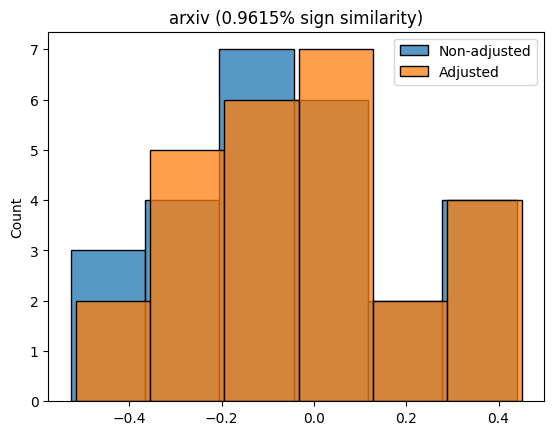

In [27]:
plt_by_system_normal('arxiv')

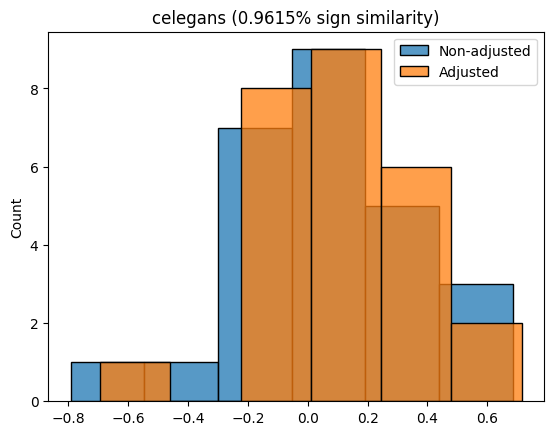

In [28]:
plt_by_system_normal('celegans')

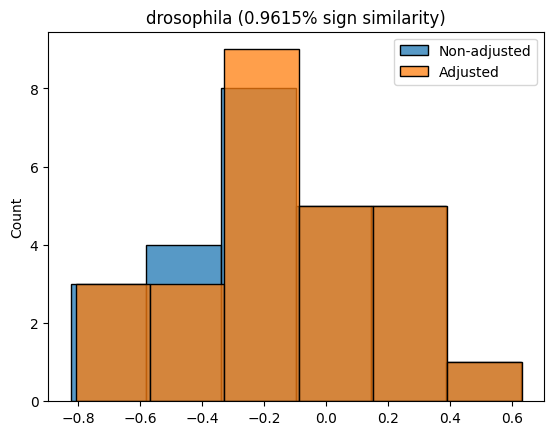

In [29]:
plt_by_system_normal('drosophila')

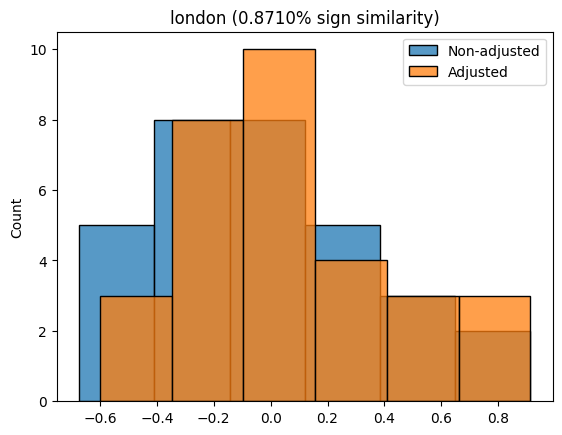

In [30]:
plt_by_system_normal('london')

## Uniform prior

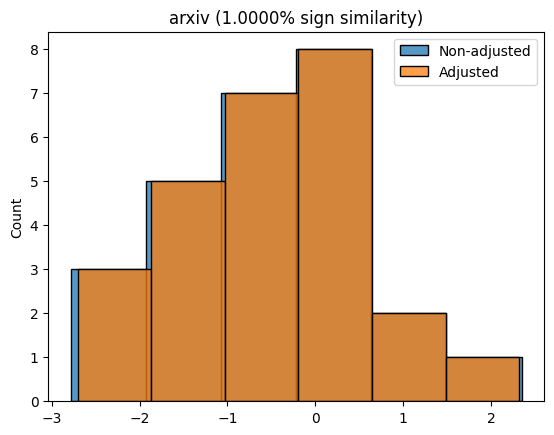

In [31]:
plt_by_system_uniform('arxiv')

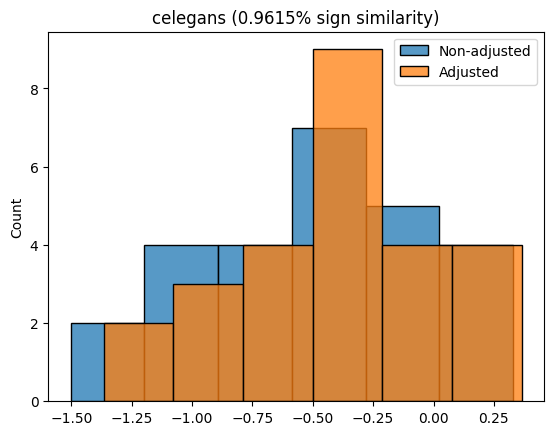

In [32]:
plt_by_system_uniform('celegans')

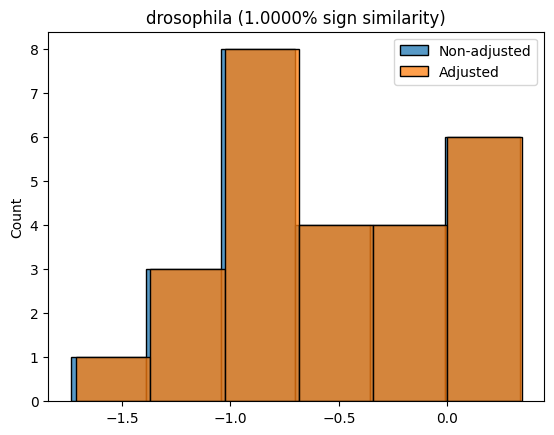

In [33]:
plt_by_system_uniform('drosophila')

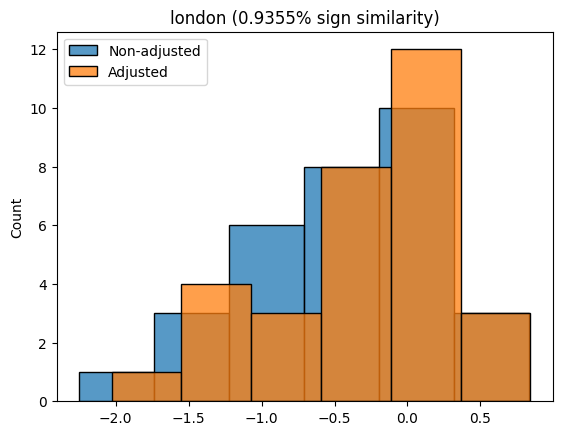

In [34]:
plt_by_system_uniform('london')

## Beta prior

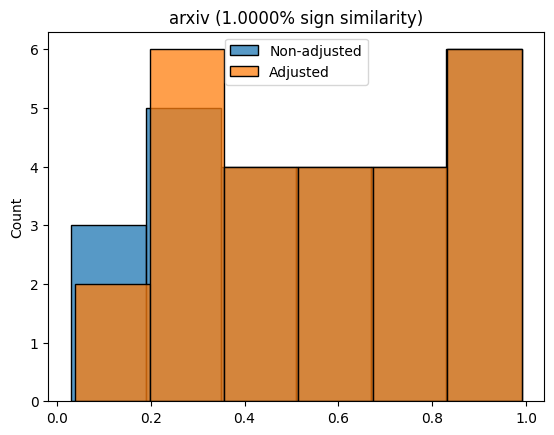

In [40]:
plt_by_system_beta('arxiv')

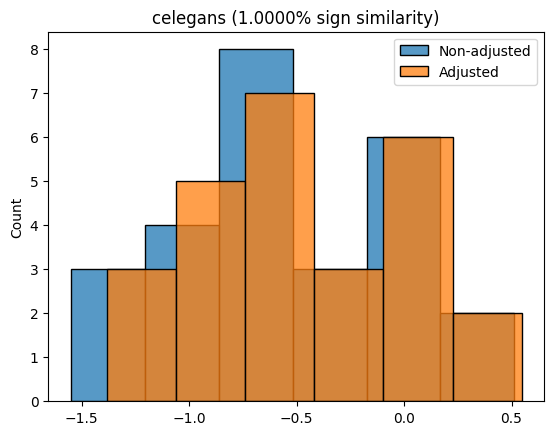

In [130]:
plt_by_system_uniform('celegans')

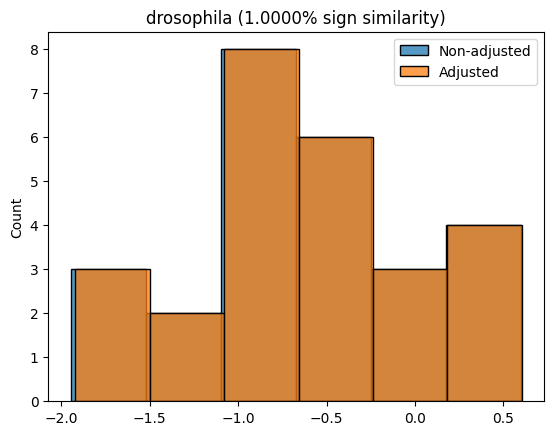

In [131]:
plt_by_system_uniform('drosophila')

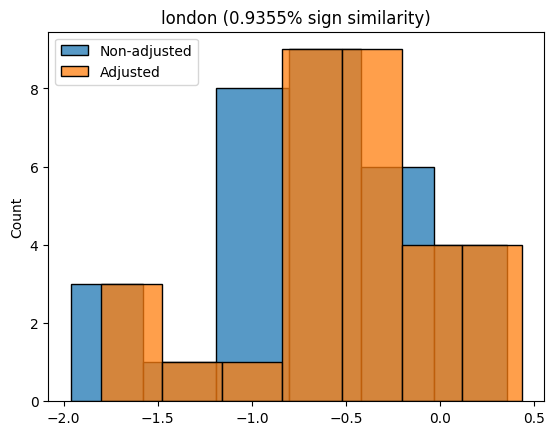

In [132]:
plt_by_system_uniform('london')

# Examining logistic regression _trained_ with imbalance

In [125]:
df = pd.read_csv('explore_coefs-real-trained-imbalance.csv', header=None)
df.columns = ['system','layers','theta','embedding','intercept','imblogreg-coef_imb','imblogreg-coef_dists','imblogreg-coef_degs']
df = (
    df
    .merge(df_coefs_proc.query('embedding=="N2V"')[['system', 'proc-coef_intercept', 'exp-coef_distances','exp-coef_degrees']], on='system')
)
display(df)

,system,layers,theta,embedding,intercept,imblogreg-coef_imb,imblogreg-coef_dists,imblogreg-coef_degs,proc-coef_intercept,exp-coef_distances,exp-coef_degrees
0,arxiv,6-7,0.3,N2V,0.0,0.302120,-4.980248,-7.517274,-0.316029,-4.980248,-7.517274
1,arxiv,6-7,0.3,N2V,0.0,0.302120,-4.980248,-7.517274,-0.324525,-4.820298,-7.438816
2,arxiv,6-7,0.3,N2V,0.0,0.302120,-4.980248,-7.517274,-0.257493,-4.361448,-7.307689
3,arxiv,6-7,0.3,N2V,0.0,0.302120,-4.980248,-7.517274,-0.238004,-4.501785,-7.401442
4,arxiv,6-7,0.3,N2V,0.0,0.302120,-4.980248,-7.517274,-0.197200,-4.924875,-7.685683
5,arxiv,6-7,0.3,N2V,0.0,0.302120,-4.980248,-7.517274,-0.252851,-4.510340,-7.525408
6,arxiv,6-7,0.3,N2V,0.0,0.302120,-4.980248,-7.517274,-0.278215,-5.021680,-7.503734
7,arxiv,6-7,0.3,N2V,0.0,0.302120,-4.980248,-7.517274,-0.240974,-5.418831,-7.704948
8,arxiv,6-7,0.3,N2V,0.0,0.302120,-4.980248,-7.517274,-0.191047,-4.695091,-7.580728
9,arxiv,6-7,0.3,N2V,0.0,0.250464,-4.361448,-7.307689,-0.316029,-4.980248,-7.517274


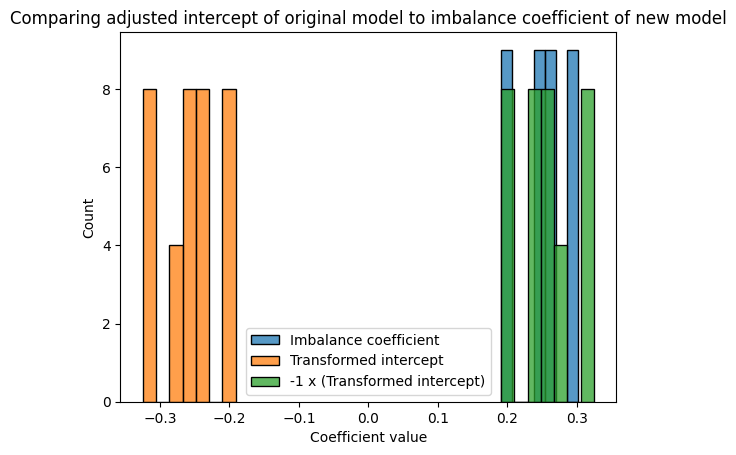

In [131]:
g=sns.histplot(df['imblogreg-coef_imb'], label='Imbalance coefficient')
sns.histplot(df['proc-coef_intercept'], label='Transformed intercept')
sns.histplot(-1*df['proc-coef_intercept'], label='-1 x (Transformed intercept)')

g.legend()
g.set_xlabel('Coefficient value')
g.set_title('Comparing adjusted intercept of original model to imbalance coefficient of new model')

g.get_figure().savefig('verify_intercept-adjustment.png')

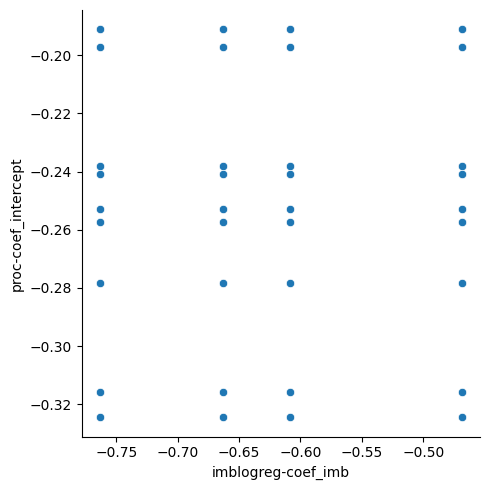

In [114]:
sns.relplot(
    data=df, kind='scatter',
    x='imblogreg-coef_imb', y='proc-coef_intercept'
)

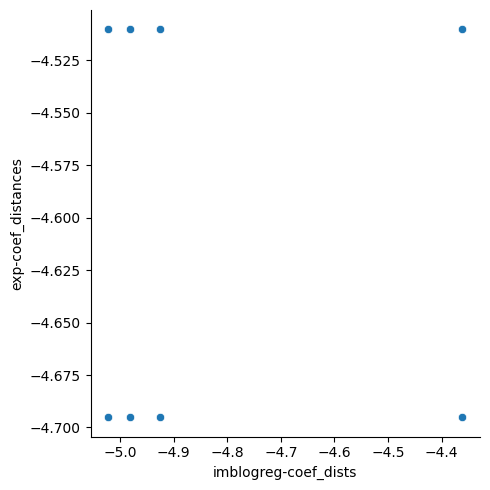

In [111]:
sns.relplot(
    data=df, kind='scatter',
    x='imblogreg-coef_dists', y='exp-coef_distances'
)

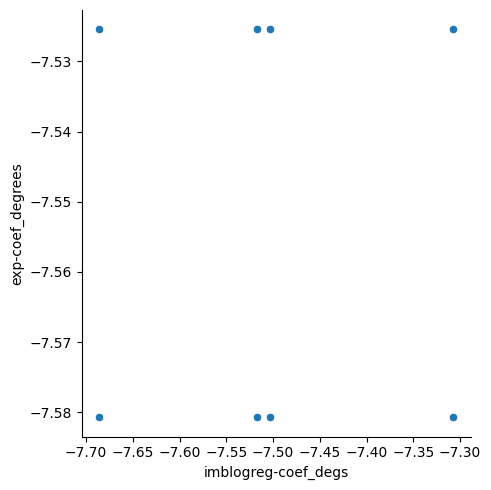

In [112]:
sns.relplot(
    data=df, kind='scatter',
    x='imblogreg-coef_degs', y='exp-coef_degrees'
)